Object Detection on Racoon Dataset

In [1]:
!pip install ultralytics
import ultralytics
ultralytics.checks

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 MB 20.7 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


<function ultralytics.utils.checks.check_yolo(verbose=True, device='')>

Navigating the Zip file

In [2]:
zip_path = "/content/drive/MyDrive/Racoon_datasets/raccoon.v1i.yolov8.zip"  # Provide path of the zip fil

Unzip the file

In [3]:
import zipfile

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/racoon_dataset')       ##a new file named 'racoon_dataset' will be create

Training the model

In [4]:
from ultralytics import YOLO

##Load YOLOv8 'nano'
model = YOLO('yolov8n.pt')

##Train the model
model.train(data = '/content/racoon_dataset/data.yaml' , epochs = 10 , imgsz = 640)

100%|██████████| 6.25M/6.25M [00:00<00:00, 75.0MB/s]


Ultralytics 8.3.152 🚀 Python-3.11.13 torch-2.6.0+cpu CPU (Intel Xeon 2.00GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/racoon_dataset/data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=

100%|██████████| 755k/755k [00:00<00:00, 14.0MB/s]

Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

Model summary: 129 layers, 3,011,043 parameters, 3,011,027 gradients, 8.2 GFLOPs

Transferred 319/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1241.9±397.1 MB/s, size: 55.7 KB)


train: Scanning /content/racoon_dataset/train/labels... 1972 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1972/1972 [00:01<00:00, 1593.75it/s]

train: New cache created: /content/racoon_dataset/train/labels.cache
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1440.6±427.5 MB/s, size: 75.0 KB)



val: Scanning /content/racoon_dataset/valid/labels... 42 images, 0 backgrounds, 0 corrupt: 100%|██████████| 42/42 [00:00<00:00, 1381.52it/s]

val: New cache created: /content/racoon_dataset/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train
Starting training for 10 epochs...
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10         0G      1.187      2.104      1.849          4        640: 100%|██████████| 124/124 [06:20<00:00,  3.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.00s/it]

                   all         42         48      0.695      0.542      0.559      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10         0G      1.197      1.498      1.844          4        640: 100%|██████████| 124/124 [06:14<00:00,  3.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.46s/it]

                   all         42         48      0.605        0.5      0.408      0.116



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10         0G      1.219      1.187      1.861          5        640: 100%|██████████| 124/124 [06:15<00:00,  3.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.51s/it]

                   all         42         48      0.578      0.657      0.612      0.202



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10         0G      1.148     0.9605      1.778          6        640: 100%|██████████| 124/124 [06:13<00:00,  3.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.45s/it]

                   all         42         48      0.463      0.413      0.308     0.0854



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10         0G      1.071     0.8251      1.685          4        640: 100%|██████████| 124/124 [06:14<00:00,  3.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.50s/it]

                   all         42         48      0.594      0.625      0.564      0.186



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10         0G      0.929     0.6909      1.548          4        640: 100%|██████████| 124/124 [06:15<00:00,  3.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.60s/it]

                   all         42         48      0.767      0.625      0.605      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10         0G     0.8247     0.5839      1.449          5        640: 100%|██████████| 124/124 [06:18<00:00,  3.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.67s/it]

                   all         42         48      0.773      0.569      0.616      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10         0G     0.7282      0.526       1.36          5        640: 100%|██████████| 124/124 [06:18<00:00,  3.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.70s/it]

                   all         42         48       0.54      0.489      0.421      0.104



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10         0G     0.6394     0.4452      1.263          4        640: 100%|██████████| 124/124 [06:20<00:00,  3.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.71s/it]

                   all         42         48      0.751      0.667      0.631      0.232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10         0G     0.5629     0.3942      1.183          5        640: 100%|██████████| 124/124 [06:20<00:00,  3.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.70s/it]

                   all         42         48      0.755      0.708      0.646      0.247



10 epochs completed in 1.057 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.152 🚀 Python-3.11.13 torch-2.6.0+cpu CPU (Intel Xeon 2.00GHz)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.61s/it]


                   all         42         48      0.774      0.569      0.616      0.253
Speed: 0.9ms preprocess, 69.1ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x789d555b48d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

Prediction on Test Data

In [5]:
results = model.predict(source = '/content/racoon_dataset/test/images' , save = True)


image 1/16 /content/racoon_dataset/test/images/2018-07-16-cat-raccoon-conflict-sm_jpg.rf.ece3489616ea9836dbdb24002eb98bc1.jpg: 640x640 3 RacoonsFinder - v2 2023-01-29 11-33pms, 122.1ms
image 2/16 /content/racoon_dataset/test/images/6c86f6b1443df0e087be3199141e1ae3_jpg.rf.764619910df9b4e2ffe3460fc0f60c68.jpg: 640x640 1 RacoonsFinder - v2 2023-01-29 11-33pm, 99.3ms
image 3/16 /content/racoon_dataset/test/images/crop-_jpg.rf.72cf39a701641780ed89c746757fa7c4.jpg: 640x640 3 RacoonsFinder - v2 2023-01-29 11-33pms, 46.0ms
image 4/16 /content/racoon_dataset/test/images/index_jpg.rf.cf17a8e7d34515e1c51d3a21fdbcab4f.jpg: 640x640 1 RacoonsFinder - v2 2023-01-29 11-33pm, 99.6ms
image 5/16 /content/racoon_dataset/test/images/p1douoteme1mt7156p11o3hkp174j6_png_jpg.rf.1aef0e228673f5505de328658c05bf8b.jpg: 640x640 1 RacoonsFinder - v2 2023-01-29 11-33pm, 97.1ms
image 6/16 /content/racoon_dataset/test/images/pexels-abi-zara-14770560_jpg.rf.e3bd8436993630568fc4af64ca5c0ffe.jpg: 640x640 2 RacoonsFinder 

To view a random image from 'train2'

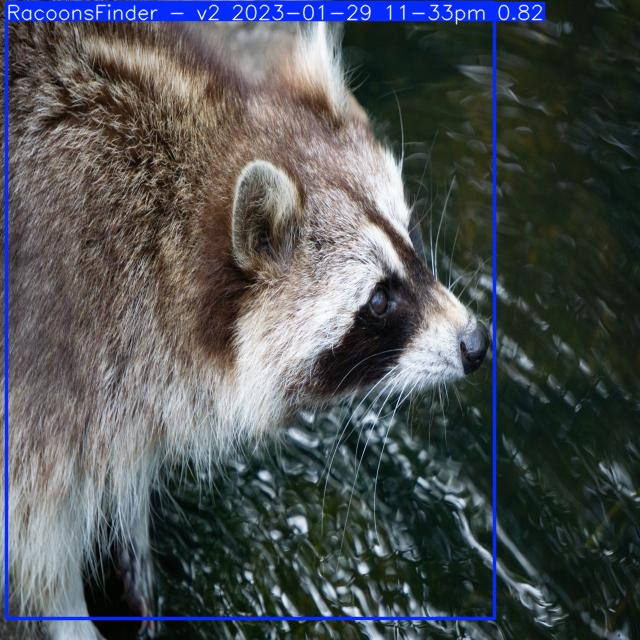

In [6]:
import os
from IPython.display import Image,display

pred_path = '/content/runs/detect/train2'

img_name = os.listdir(pred_path)[4]   ##To view 5th image
display(Image(filename = os.path.join(pred_path , img_name)))

Detecting a Custom 'Racoon' image from local machine

In [7]:
from google.colab import files
uploaded = files.upload()

Saving Racoon.jpeg to Racoon.jpeg


In [8]:
results = model.predict(source = 'Racoon.jpeg' , save = True)


image 1/1 /content/Racoon.jpeg: 640x640 3 RacoonsFinder - v2 2023-01-29 11-33pms, 48.2ms
Speed: 3.4ms preprocess, 48.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/train3


Displaying the output image

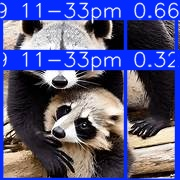

In [9]:
pred_path = '/content/runs/detect/train3'
pred_img = os.listdir(pred_path)[0]
display(Image(filename=os.path.join(pred_path , pred_img)))